# Volcano and Heatmap

In [1]:
library("tidyverse")

Warning message:
"package 'tidyverse' was built under R version 4.1.2"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
library(dplyr)
library(tidyr)

In [3]:
FoldChange <- read.table("./FoldChange.csv",sep=',', header = T, row.names = 1)

In [4]:
head(FoldChange)

,pvalue,log2FC,Gene
,<dbl>,<dbl>,<chr>
Q09666,0.002141511,1.25644317,AHNAK
Q15149-3,0.340135415,0.08117139,PLEC
Q15149,0.000319444,0.91329164,PLEC
Q15149-8,0.006280590,-0.37684673,PLEC
Q15149-4,0.000223258,1.38131662,PLEC
P21333-2,0.146827666,-0.11675658,FLNA


In [5]:
FoldChange$difference <- "NO"

head(FoldChange)

,pvalue,log2FC,Gene,difference
,<dbl>,<dbl>,<chr>,<chr>
Q09666,0.002141511,1.25644317,AHNAK,NO
Q15149-3,0.340135415,0.08117139,PLEC,NO
Q15149,0.000319444,0.91329164,PLEC,NO
Q15149-8,0.006280590,-0.37684673,PLEC,NO
Q15149-4,0.000223258,1.38131662,PLEC,NO
P21333-2,0.146827666,-0.11675658,FLNA,NO


In [6]:
FoldChange$difference[  FoldChange$log2FC > log(1.2,2) & FoldChange$pvalue <0.05  ] <-"UP"

FoldChange$difference[  FoldChange$log2FC < -log(1.2,2) & FoldChange$pvalue <0.05  ] <-"DOWN"



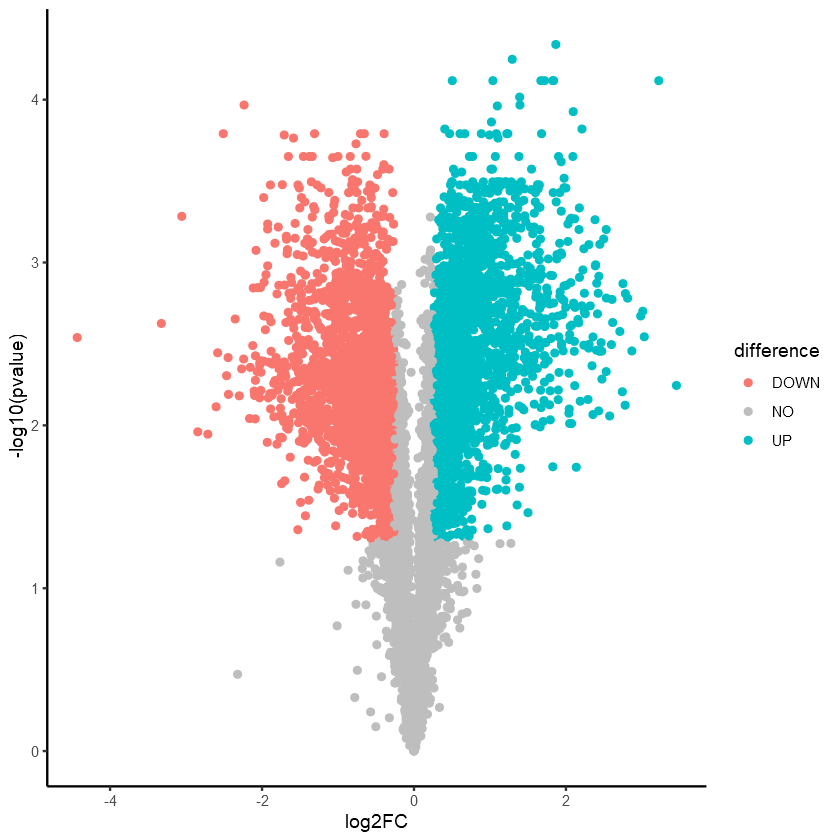

In [7]:
p1 <- ggplot(data=FoldChange, aes(x=log2FC, y=-log10(pvalue), col=difference)) + 
geom_point() +theme_classic() +
scale_color_manual(values = c("#F8766D","gray","#00BFC4"))


p1

## ggplot dot labeling

In [8]:
library(ggrepel)

In [9]:
head(FoldChange)

,pvalue,log2FC,Gene,difference
,<dbl>,<dbl>,<chr>,<chr>
Q09666,0.002141511,1.25644317,AHNAK,UP
Q15149-3,0.340135415,0.08117139,PLEC,NO
Q15149,0.000319444,0.91329164,PLEC,UP
Q15149-8,0.006280590,-0.37684673,PLEC,DOWN
Q15149-4,0.000223258,1.38131662,PLEC,UP
P21333-2,0.146827666,-0.11675658,FLNA,NO


Warning message:
"ggrepel: 7719 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


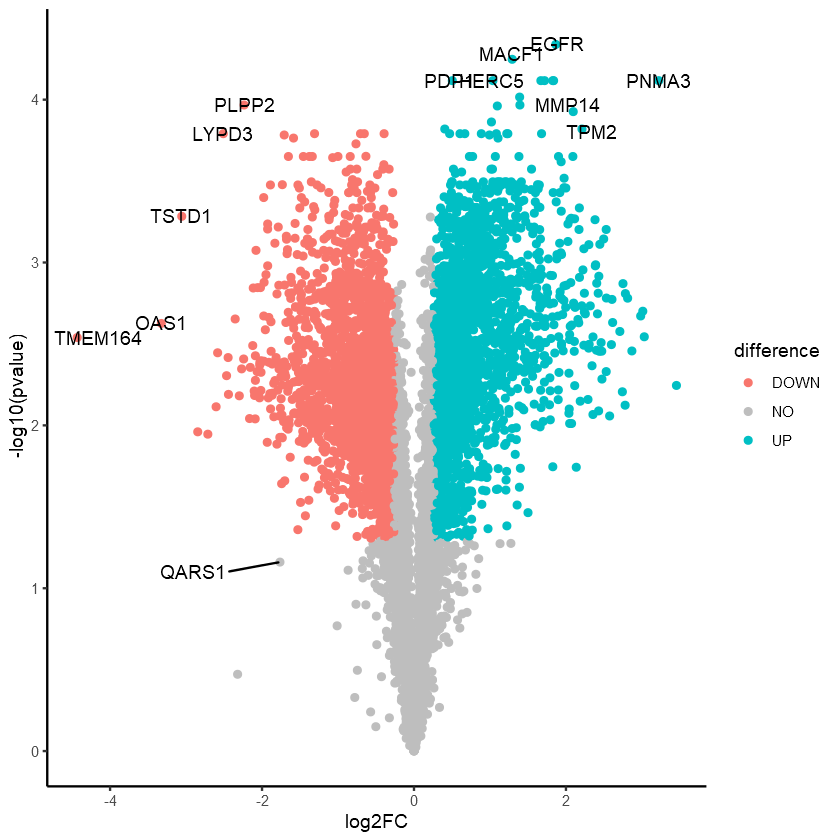

In [10]:
p2 <- ggplot(data=FoldChange, aes(x=log2FC, y=-log10(pvalue), col=difference,label=Gene)) + 
geom_point() +theme_classic() +
scale_color_manual(values = c("#F8766D","gray","#00BFC4")) +
geom_text_repel(color="black")

p2

In [11]:
FoldChange.label <- read.table("./FoldChange_label.csv", sep=',',header = T)

In [12]:
head(FoldChange.label)

,Accession,pvalue,log2FC,Gene,Label
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,A0A024QZ33,0.009851432,0.2470688,NSRP1,NO
2,A0A024QZW4,0.003714018,-0.6503038,SLC35B3,NO
3,A0A024R4E5,0.001340196,0.1430792,HDLBP,NO
4,A0A024R571,0.001533934,0.9758036,EHD1,YES
5,A0A024RAC6,0.000161727,-0.7039957,ELOA,NO
6,A0A024RCR6,0.052040553,0.1463875,BAG6,NO


In [13]:
FoldChange.label$difference <- "NO"

FoldChange.label$difference[  FoldChange.label$log2FC > log(1.2,2) & FoldChange.label$pvalue <0.05  ] <-"UP"

FoldChange.label$difference[  FoldChange.label$log2FC < -log(1.2,2) & FoldChange.label$pvalue <0.05  ] <-"DOWN"


In [14]:
FoldChange.label$Label[  FoldChange.label$Label =="YES"  ] <- FoldChange.label$Gene[  FoldChange.label$Label =="YES"  ]
FoldChange.label$Label[  FoldChange.label$Label =="NO"  ] <- NA

In [15]:
head(FoldChange.label)

,Accession,pvalue,log2FC,Gene,Label,difference
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,A0A024QZ33,0.009851432,0.2470688,NSRP1,NA,NO
2,A0A024QZW4,0.003714018,-0.6503038,SLC35B3,NA,DOWN
3,A0A024R4E5,0.001340196,0.1430792,HDLBP,NA,NO
4,A0A024R571,0.001533934,0.9758036,EHD1,EHD1,UP
5,A0A024RAC6,0.000161727,-0.7039957,ELOA,NA,DOWN
6,A0A024RCR6,0.052040553,0.1463875,BAG6,NA,NO


Warning message:
"Removed 7743 rows containing missing values (geom_text_repel)."
Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


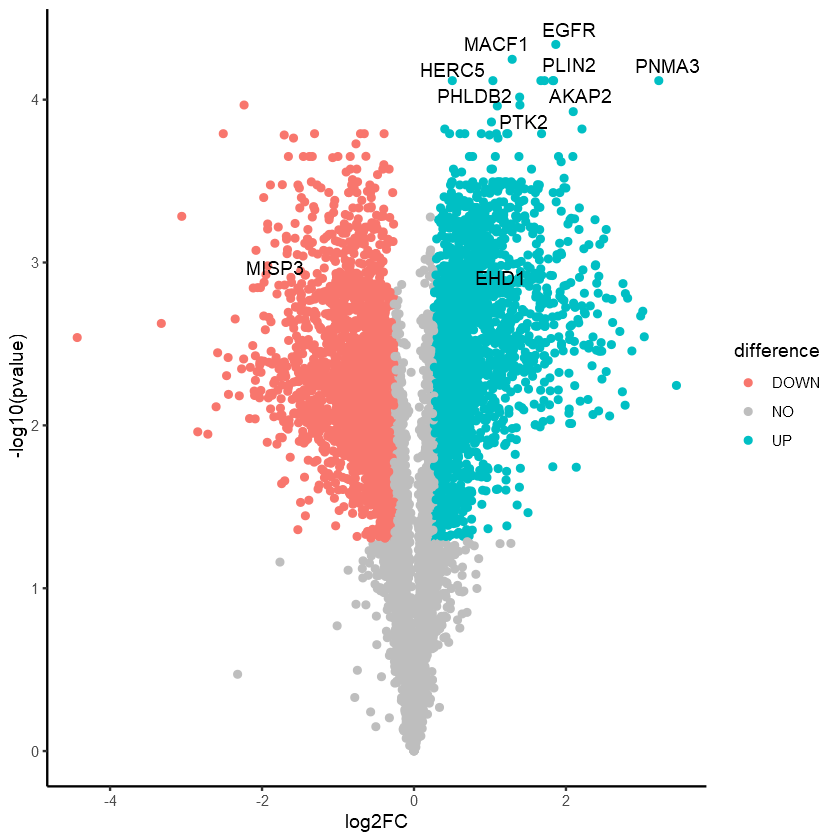

In [16]:
p3 <- ggplot(data=FoldChange.label, aes(x=log2FC, y=-log10(pvalue), col=difference,label=Label)) + 
geom_point() +theme_classic() +
scale_color_manual(values = c("#F8766D","gray","#00BFC4")) +
geom_text_repel(color="black")

p3

# Heatmap data

In [17]:
library(pheatmap)

Warning message:
"package 'pheatmap' was built under R version 4.1.2"


In [18]:
selet_DEPs <- read.table("./Select_Proteins_Normalized_abudance.txt",
                         sep='\t',header = T,row.names = 1)

In [19]:
head(selet_DEPs)

,wt1,wt2,wt3,ko1,ko2,ko3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A0R4IZY0,8.600989,8.630331,8.627368,8.788076,8.751789,8.779232
A0A140T8J4,7.438014,7.531732,7.505277,6.570411,6.506607,6.557987
A0A5K1VVS7,4.033107,4.010788,4.021532,3.897513,3.874956,3.888540
D3Z4C9,5.720125,5.734133,5.730803,5.549447,5.533970,5.530733
D6RGM8,2.155996,2.163340,2.125520,1.866826,1.848495,1.806531
E9PYD1,2.874815,2.911906,2.880786,2.618299,2.606916,2.579025


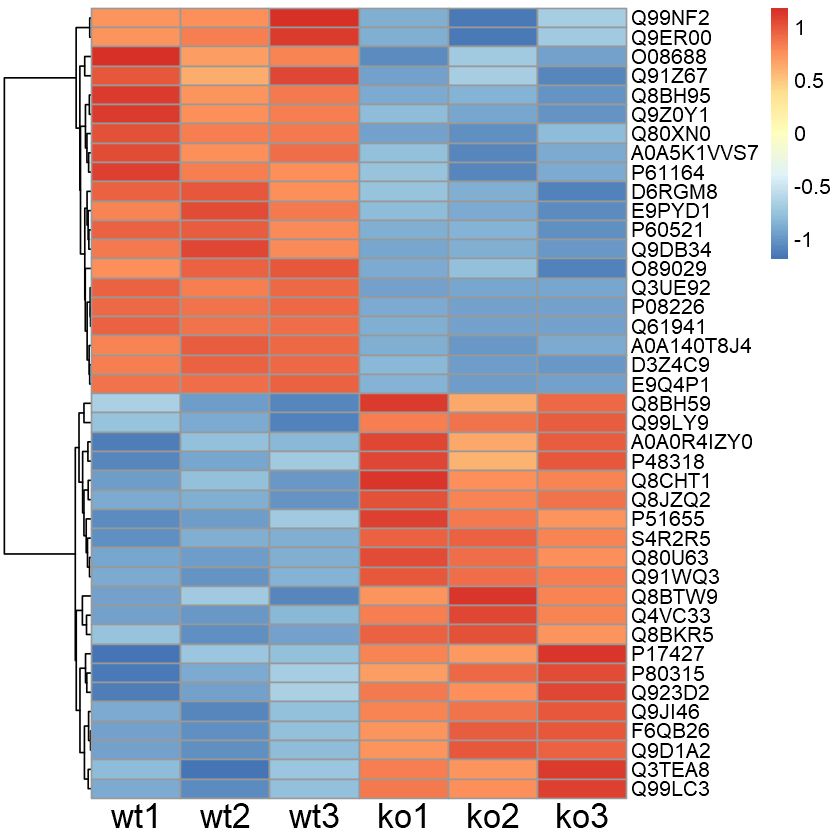

In [20]:
pheatmap(selet_DEPs,scale="row",cluster_cols=FALSE,cluster_row=TRUE,
        angle_col = c("0"),fontsize=12,fontsize_col = 20,legend = TRUE,
        show_rownames=TRUE)

# heatmap with label

In [21]:
selet_DEPs_label <- read.table("./Select_Proteins_Normalized_abudance_with_label.txt",
                               sep='\t',header = T,row.names = 1)

In [22]:
head(selet_DEPs_label)

,wt1,wt2,wt3,ko1,ko2,ko3,labs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A0A0R4IZY0,8.600989,8.630331,8.627368,8.788076,8.751789,8.779232,A0A0R4IZY0
A0A140T8J4,7.438014,7.531732,7.505277,6.570411,6.506607,6.557987,
A0A5K1VVS7,4.033107,4.010788,4.021532,3.897513,3.874956,3.888540,
D3Z4C9,5.720125,5.734133,5.730803,5.549447,5.533970,5.530733,
D6RGM8,2.155996,2.163340,2.125520,1.866826,1.848495,1.806531,D6RGM8
E9PYD1,2.874815,2.911906,2.880786,2.618299,2.606916,2.579025,


In [23]:
heatmap.label <- selet_DEPs_label$labs
selet_DEPs <- selet_DEPs_label[,  1:6]

In [24]:
head(heatmap.label)
head(selet_DEPs)

[1] "A0A0R4IZY0" ""           ""           ""           "D6RGM8"    
[6] ""

,wt1,wt2,wt3,ko1,ko2,ko3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A0R4IZY0,8.600989,8.630331,8.627368,8.788076,8.751789,8.779232
A0A140T8J4,7.438014,7.531732,7.505277,6.570411,6.506607,6.557987
A0A5K1VVS7,4.033107,4.010788,4.021532,3.897513,3.874956,3.888540
D3Z4C9,5.720125,5.734133,5.730803,5.549447,5.533970,5.530733
D6RGM8,2.155996,2.163340,2.125520,1.866826,1.848495,1.806531
E9PYD1,2.874815,2.911906,2.880786,2.618299,2.606916,2.579025


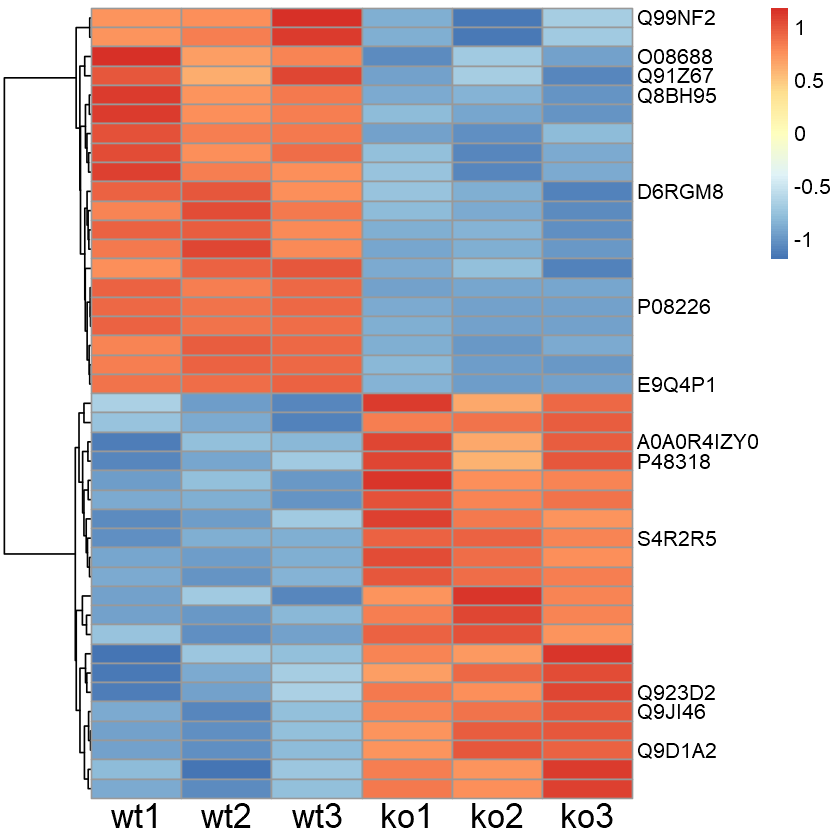

In [25]:
pheatmap(selet_DEPs,scale="row",cluster_cols=FALSE,cluster_row=TRUE,
        angle_col = c("0"),fontsize=12,fontsize_col = 20,legend = TRUE,
        show_rownames=TRUE, labels_row=heatmap.label)